In [ ]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [ ]:
# Do NOT modify this block of code
n = 200

rand_x = np.random.RandomState(0)
x = rand_x.randint(1, 100, (n, 1))

rand_noise = np.random.RandomState(10)
y = 2.13 * x - 50.84 + 10*rand_noise.randn(n, 1)

In [ ]:
def fit_regression_line(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:

    # Calculating beta 1
    beta_1 = ((x - x.mean()) * (y - y.mean())).sum()/(((x - x.mean())**2).sum())

    # Calculating beta 0
    beta_0 = y.mean() - (beta_1*x.mean())

    return np.array([beta_0, beta_1])

In [ ]:
# Do NOT modify this block of code.
# If this code cell run without any 'AssertionError', then your function 'fit_regression_line' is returning a numpy array with the correct shape.
assert fit_regression_line(x, y).shape == (2, )

In [ ]:
# Do NOT modify this block of code
def rmse(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return np.sqrt(np.mean((y - y_hat)**2))

print(f"RMSE score is: {np.round(rmse(x, y), 4)}")

RMSE score is: 9.7621


In [ ]:
# Do NOT modify this block of code
def r_squared(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return (np.corrcoef(y_hat, y, rowvar=False)[0, 1])**2

print(f"R-Squared score is: {np.round(r_squared(x, y), 4)}")

R-Squared score is: 0.9737


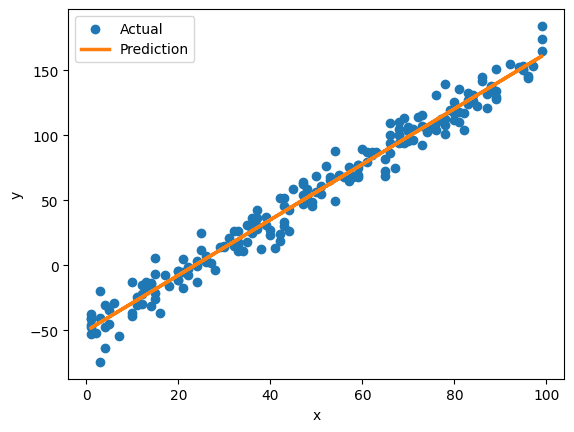

In [ ]:
# Do NOT modify this block of code
def plot_predictions(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> None:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    plt.scatter(x.flatten(), y.flatten(), color=plt.cm.tab10(0), label='Actual')
    plt.plot(x.flatten(), y_hat.flatten(), color=plt.cm.tab10(1), linewidth=2.5, label='Prediction')

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

plot_predictions(x, y)

In [ ]:
# Do NOT modify this block of code

import pandas as pd

In [ ]:
# Do NOT modify this block of code

import seaborn as sns

iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
def normalize(value, sample_mean, stdeva):
  z_score = (value - sample_mean)/stdeva
  return z_score

normalized_iris_df = iris_df.copy()

# Iterating through columns with numeric values (float, int, double) and applying normalize function to each x in the column with .apply and lambda
for col in normalized_iris_df.select_dtypes(include = ['number']).columns:
  normalized_iris_df[col] = normalized_iris_df[col].apply(lambda x: normalize(x, normalized_iris_df[col].mean(), normalized_iris_df[col].std()))

normalized_iris_df.head()

# Code to verify mean = 0 and std = 1
# print(iris_df['petal_width'].mean())
# print(iris_df['petal_width'].std())

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa


In [ ]:
# Creating a new column at index 0 called mean_zscore and fillling with value 0
normalized_iris_df.insert(loc = 0, column = 'mean_zscore', value = 0)

# Selecting all elements in the row with a numeric value (float, int, double), dropping newly added column with 0 value so it is not used in the .mean() calculation, and iterating rows
normalized_iris_df['mean_zscore'] = normalized_iris_df.select_dtypes(include=['number']).drop(columns = ['mean_zscore']).mean(axis=1)

# Sorting the mean_zscore column by descending order
normalized_iris_df = normalized_iris_df.sort_values(by = 'mean_zscore', ascending = False)

normalized_iris_df.head()

,mean_zscore,sepal_length,sepal_width,petal_length,petal_width,species
117,1.731358,2.242172,1.703886,1.666574,1.312801,virginica
131,1.683658,2.483699,1.703886,1.496631,1.050416,virginica
109,1.479113,1.638355,1.245030,1.326688,1.706379,virginica
135,1.220329,2.242172,-0.131539,1.326688,1.443994,virginica
105,1.195351,2.121409,-0.131539,1.609926,1.181609,virginica


In [ ]:
# Grouping all similar species together, and then applying absolute value functoin and maximum function in order to filter, then sort in ascending order
normalized_iris_df.groupby('species')['mean_zscore'].apply(lambda x: x.abs().max()).sort_values(ascending = True)

,mean_zscore
species,
versicolor,0.962980
setosa,1.483012
virginica,1.731358
